In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets
from PIL import Image
import numpy as np
from collections import Counter

In [3]:
data_dir = '../data'

dataset = datasets.ImageFolder(data_dir)
class_names = dataset.classes
class_counts = Counter(dataset.targets)

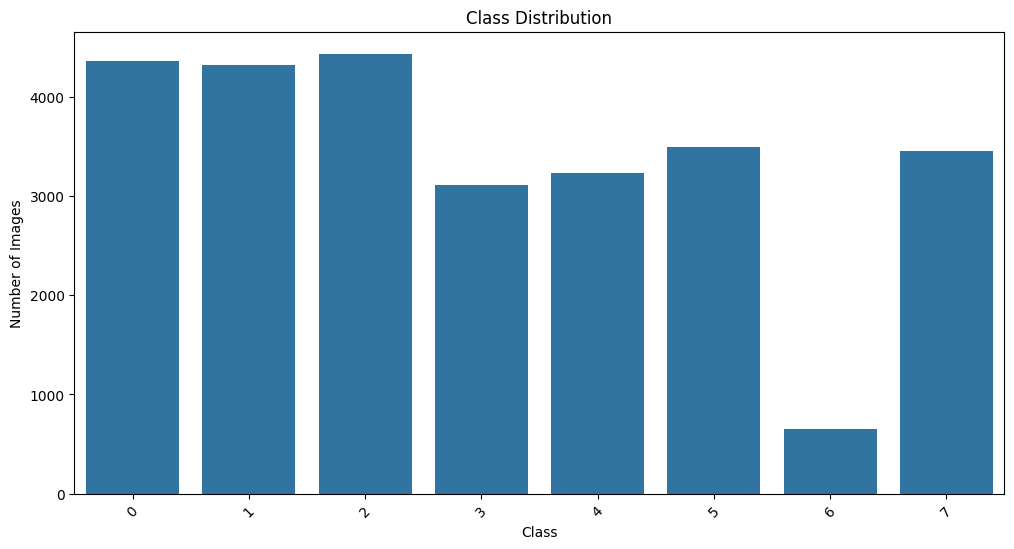

In [4]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

In [5]:
print(dataset.class_to_idx)

{'0': 0, '130': 1, '180': 2, '230': 3, '270': 4, '320': 5, '40': 6, '90': 7}


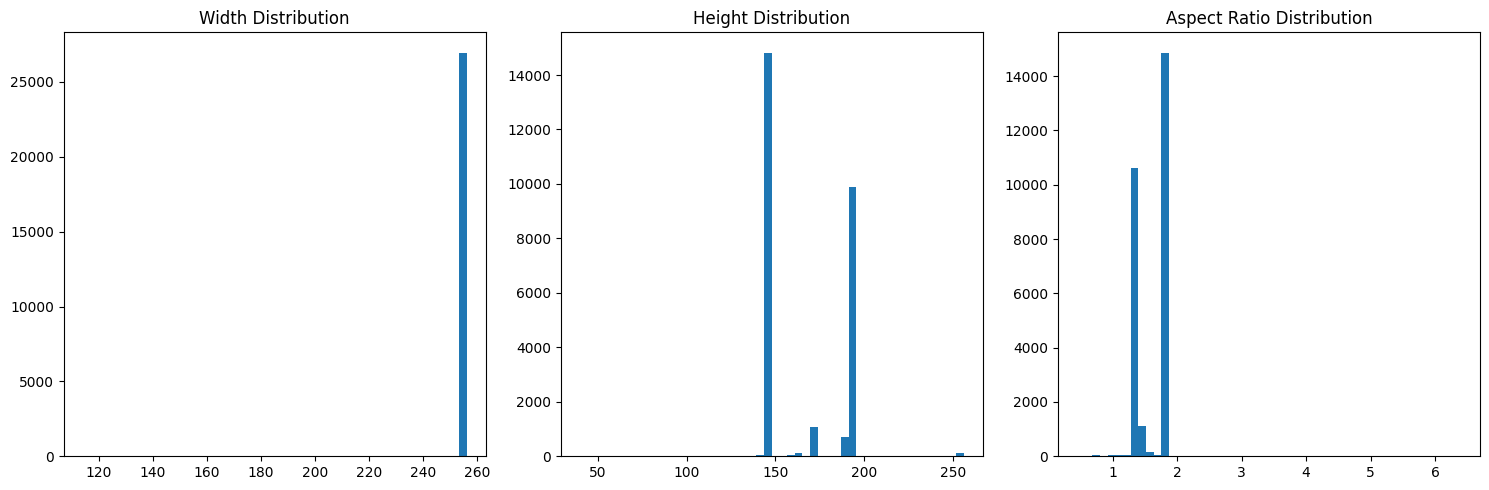

In [6]:
widths = []
heights = []
aspect_ratios = []

for img_path, _ in dataset.samples:
    with Image.open(img_path) as img:
        width, height = img.size
        widths.append(width)
        heights.append(height)
        aspect_ratios.append(width / height)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.hist(widths, bins=50)
plt.title('Width Distribution')
plt.subplot(132)
plt.hist(heights, bins=50)
plt.title('Height Distribution')
plt.subplot(133)
plt.hist(aspect_ratios, bins=50)
plt.title('Aspect Ratio Distribution')
plt.tight_layout()
plt.show()

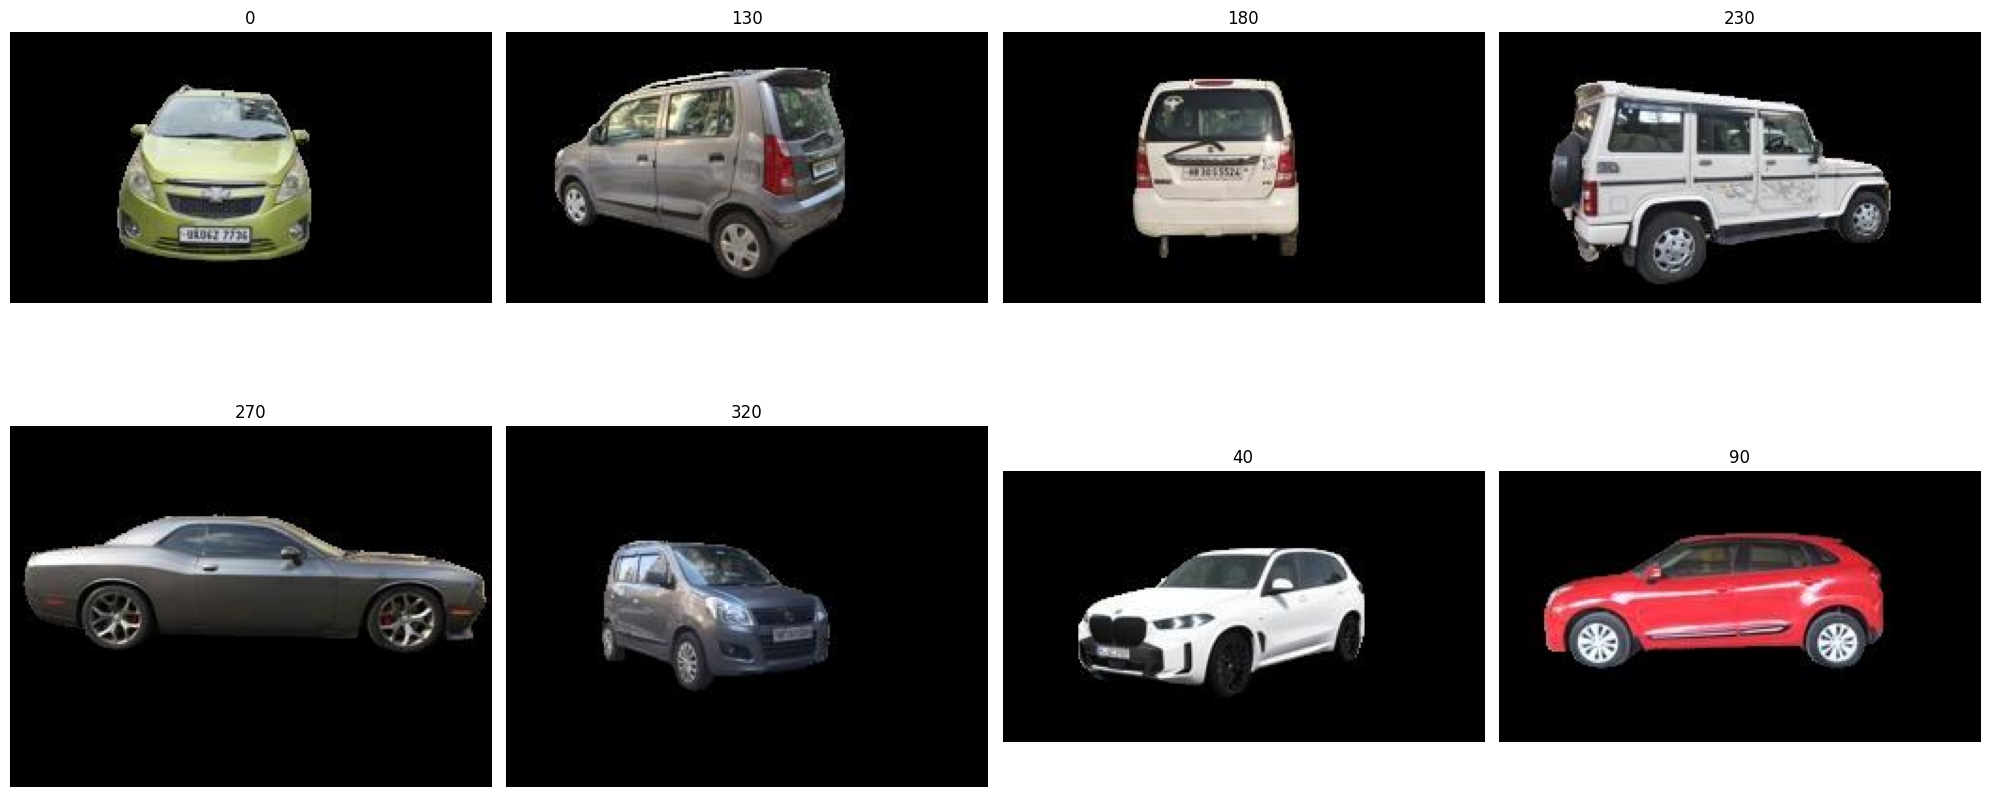

In [7]:
# Sample Images
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_dir, class_name)
    img_path = os.path.join(class_path, os.listdir(class_path)[0])
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

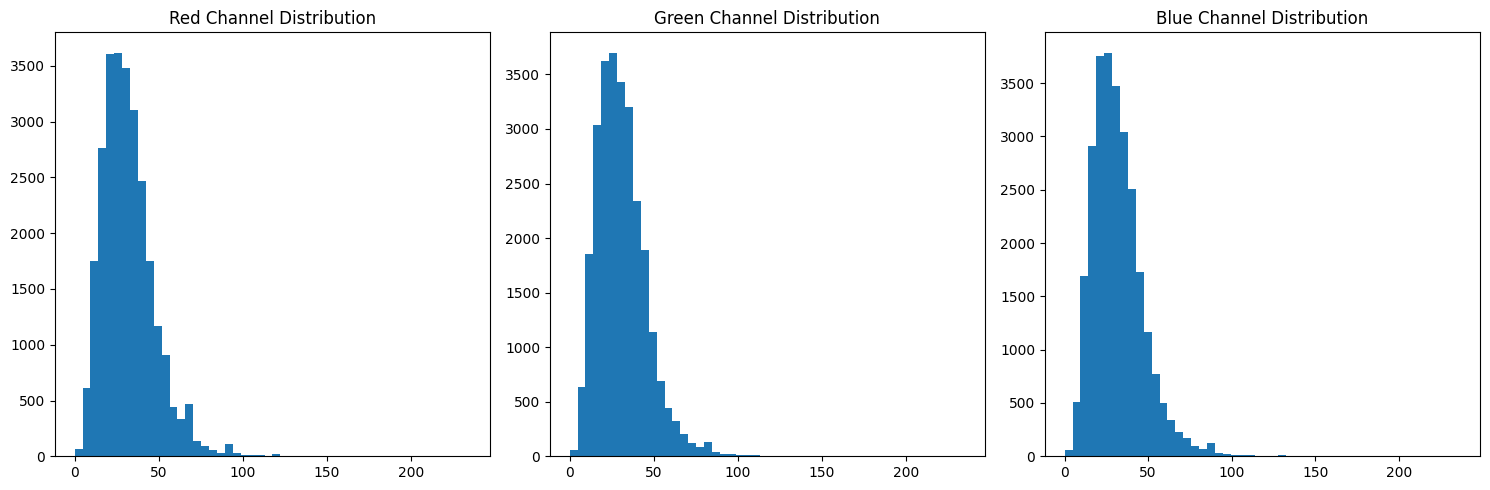

In [8]:
# Color Distribution
def get_color_distribution(img_path):
    img = Image.open(img_path).convert('RGB')
    img_array = np.array(img)
    return img_array.mean(axis=(0, 1))

color_distributions = [get_color_distribution(img_path) for img_path, _ in dataset.samples]
color_distributions = np.array(color_distributions)

plt.figure(figsize=(15, 5))
for i, color in enumerate(['Red', 'Green', 'Blue']):
    plt.subplot(131 + i)
    plt.hist(color_distributions[:, i], bins=50)
    plt.title(f'{color} Channel Distribution')
plt.tight_layout()
plt.show()